# Graduate Rotational Internship Program - The Sparks Foundation

## Data Science & Business Analytics

### BY MOHAMMED DHARWISH T K

The first task is to predict the percentage of marks that a student is expected to score based upon the number of hours they have studied. This is a simple linear regression task as it involves only two variables. 

The first step is to get necessary imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

The next step is to import the data set from the url and then converting it into useful or required format. Here we are using a Linear regression model.

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

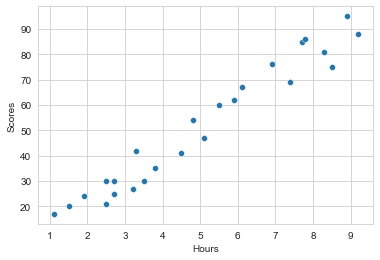

In [5]:
sns.scatterplot(x= data.Hours, y= data.Scores)

#### From the above graph, as we can see that as x increases y tends to increase , therefore we can say that there is a positive correlation between the variables

### Preparing the data

The next step is to divide the data in format required for implementing the build in train_test_split() method. 

This method is used for dividing the data into training and testing sets so that we can train our regression model inorder to predict the outcome. The training data set is generally larger as compared to the test data. Having a larger training dataset gives us a better fitted model and can help in reducing the errors.

In [14]:
X = np.array(data.drop('Scores',1))
Y = np.array(data.Scores)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

The above code divides the set into train and test. Since test_size is 0.2 there will be an 80-20 split for training and testing. The random_state is used for shuffling the data before splitting , here there is no shuffling as it is set to 0.

In [21]:
X_train.size, X_test.size, Y_train.size, Y_test.size

(20, 5, 20, 5)

In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,Y_train)
print("Training complete")

Training complete


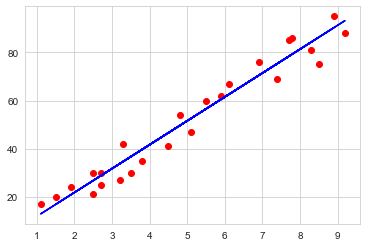

In [32]:
#plotting the regression line
line = lreg.coef_*X + lreg.intercept_

#plotting for the test data
plt.scatter(X,Y,c='r')
plt.plot(X,line,c='b')
plt.show()

# Making Predictions

Once the training is done , now we can go for predictions

In [22]:
print(X_test)# Testing data - In hours
Y_pred = lreg.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

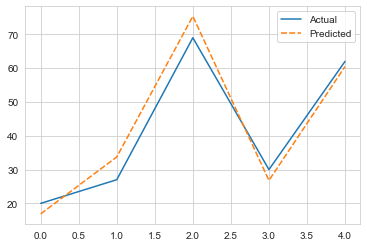

In [35]:
#lineplot for visualization using seaborn 
sns.lineplot(data=df)


In [38]:
hours=9.25
print('No.of hours = 9.25')

hours=np.array(9.25).reshape(-1,1)

pred_score = lreg.predict(hours)

print('The predicted score for  the given no.of hours is {}'.format(pred_score))

No.of hours = 9.25
The predicted score for  the given no.of hours is [93.69173249]


## Evaluating the model

Finally we are evaluating the performance of the algorithm. Here I have used root mean squared error and mean squared error

In [41]:
from sklearn import metrics 
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

Root mean squared error 4.647447612100373
Mean Absolute Error: 4.183859899002982
